# Project: Investigate The [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This movie database contains information about approximately 10,000 movies including genres, ratings, revenue, budget, and more. It contains movies which are released over 56 years between 1960 and 2015, it also has two columns for budget and revenue in terms of 2010 dollars accounting for inflation over time which will be used in any comparisons in my analysis instead of unadjusted ones. 
##### contain:
<ul>
    <li>Total Rows = 10866</li>
    <li>Total Columns = 21</li>
    <li>After Seeing the dataset we can say that some columns is contain null values</li>
</ul>


### Question(s) for Analysis
<ol>
    <li>Which movie title had the longest run time?</li>
    <li>Is there a relation between popularity and revenue ?</li>
    <li>Which Genre Has The Highest Release Of Movies?</li>
    <li>Which year has the heighest release of movies?</li>
    <li>Top ten movies in terms of revenues.</li>
    <li>Average Revenue of the movies</li>
    <li>Top ten movies in terms of budget.</li>
    <li>Average Budget of the movies</li>
    <li>Top ten movies in terms of popularity.</li>
    <li>highest profit movies</li>
    <li>Most Frequent Cast</li>
</ol>











In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

In [78]:
# Upgrade pandas to use dataframe.explode() function. 
 

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#Loading Data
df = pd.read_csv('tmdb-movies.csv' , index_col="id")
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Exploring the shape of data
df.shape

(10866, 20)

#### this data consist of (10866) rows, and (21) columns
#### We won't need all these columns in our investigation so we are going to drop some of them in later steps.The columns we need are: [popularity, budget, revenue, original_title, cast, director, keywords, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year.]</p>

In [4]:
#check for duplications
df.duplicated().sum()

1

#### there's onley 1 duplicated row

### Let's see some summary statistics about the data

In [5]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#inspecting for missing values to solve it
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj       

#### Most columns are represented by appropriate data types except release date column so, i'll change it from String to DateTime later during the cleaning process

### Let's check if there's null values or not

In [7]:
#checking for null values
df.isnull().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### there are null values in some columns so, we will investigate those null values and look for ways to elimenate them.


### Data Cleaning
#### in this process we need to:
>
<ul>
    <li>Remove duplicate rows from the dataset.</li>
    <li>Change format of release date to datetime format.</li>
    <li>Remove the unused columns that we don't need in the analysis process.</li>
    <li>Remove the movies which are having zero valuse of budget and revenue columns.</li>
</ul>




#### 1: Removing duplicate rows

In [9]:
#removing duplicated rows
df.drop_duplicates(inplace = True)

In [10]:
#one more check for duplicates rows
df.duplicated().sum()

0

#### 2: Removing unused columns

In [11]:
#removing unneccesesary data
df.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis = 1 , inplace = True)

In [12]:
df.shape

(10865, 14)

#### After dropping unneccesesary columns, now we have (10865) rows and (14) columns

#### 3: Drop theses rows which contain incorrect or inappropriate values. 

In [13]:
#drop NAN values
df.dropna(inplace = True)

In [14]:
#Checking for zero values in revenue and budget columns
len(df.query('revenue == "0"')),len(df.query('budget == "0"'))

(4130, 3940)

#### Row with zero values in revenue column : (4130) and in revenue column : (3940)

#### Since there is a lot of zero values in revenue and budget column, calculating the profits of these movies would lead to inappropriate results, So i think the best option here is to drop them all 

In [15]:
#Droping zero values from revenue and budget column
zero_values_rev = df[df['revenue'] == 0].index
df.drop(zero_values_rev , inplace = True , axis = 0)

In [16]:
#get rows with zero values in budget column and drop them all
zero_values_bud = df[df['budget'] == 0].index
df.drop(zero_values_bud , inplace = True , axis = 0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 135397 to 2161
Data columns (total 14 columns):
popularity              3677 non-null float64
budget                  3677 non-null int64
revenue                 3677 non-null int64
original_title          3677 non-null object
cast                    3677 non-null object
director                3677 non-null object
keywords                3677 non-null object
runtime                 3677 non-null int64
genres                  3677 non-null object
production_companies    3677 non-null object
release_date            3677 non-null object
vote_count              3677 non-null int64
vote_average            3677 non-null float64
release_year            3677 non-null int64
dtypes: float64(2), int64(5), object(7)
memory usage: 430.9+ KB


>now there is no NAN values in this dataset

#### 4: Change format of release date column to datetime format

In [18]:
df['release_date'] = pd.to_datetime(df['release_date'])
# Verifying successful type_change 
print(df['release_date'].dtypes)

datetime64[ns]


#### 5: splitting geners column into multiple rows in a seperate data frame so that we don't duplicate all values with it in the original data frame.
#### Then create a seperate dataframe from unique geners records and rotate it

In [19]:
genres_df = df['genres'].str.split("|" , expand = True)
genres_df = genres_df.stack()
genres_df = pd.DataFrame(genres_df)

In [258]:
# # Verifying successful separation 
genres_df.head()

0
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action

In [259]:
#Renaming the genres column and verifying the genres value count
genres_df.rename(columns = {0:'genres_adj'} , inplace = True)
genres_df.head()

genres_adj
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action

#### merging geners_df with the original datafeame

In [260]:
merged_df = df.merge(genres_df, left_index = True, right_index = True)

In [261]:
#check the merged dataframe
merged_df.head()

popularity     budget     revenue      original_title  \
id                                                                
135397 0   32.985763  150000000  1513528810      Jurassic World   
       1   32.985763  150000000  1513528810      Jurassic World   
       2   32.985763  150000000  1513528810      Jurassic World   
       3   32.985763  150000000  1513528810      Jurassic World   
76341  0   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                       cast         director  \
id                                                                             
135397 0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
       1  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
       2  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
       3  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
76341  0  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...    George Miller   

                                                   keywords  runtime  \
id                                                                     
135397 0  monster|dna|tyrannosaurus rex|velociraptor|island      124   
       1  monster|dna|tyrannosaurus rex|velociraptor|island      124   
       2  monster|dna|tyrannosaurus rex|velociraptor|island      124   
       3  monster|dna|tyrannosaurus rex|velociraptor|island      124   
76341  0   future|chase|post-apocalyptic|dystopia|australia      120   

                                             genres  \
id                                                    
135397 0  Action|Adventure|Science Fiction|Thriller   
       1  Action|Adventure|Science Fiction|Thriller   
       2  Action|Adventure|Science Fiction|Thriller   
       3  Action|Adventure|Science Fiction|Thriller   
76341  0  Action|Adventure|Science Fiction|Thriller   

                                       production_companies release_date  \
id                                                                         
135397 0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
       1  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
       2  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
       3  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
76341  0  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13   

          vote_count  vote_average  release_year       genres_adj  
id                                                                 
135397 0        5562           6.5          2015           Action  
       1        5562           6.5          2015        Adventure  
       2        5562           6.5          2015  Science Fiction  
       3        5562           6.5          2015         Thriller  
76341  0        6185           7.1          2015           Action

#### droping the original genres column

In [262]:
merged_df.drop('genres' , inplace = True , axis = 1)

In [263]:
merged_df.head()

popularity     budget     revenue      original_title  \
id                                                                
135397 0   32.985763  150000000  1513528810      Jurassic World   
       1   32.985763  150000000  1513528810      Jurassic World   
       2   32.985763  150000000  1513528810      Jurassic World   
       3   32.985763  150000000  1513528810      Jurassic World   
76341  0   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                       cast         director  \
id                                                                             
135397 0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
       1  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
       2  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
       3  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
76341  0  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...    George Miller   

                                                   keywords  runtime  \
id                                                                     
135397 0  monster|dna|tyrannosaurus rex|velociraptor|island      124   
       1  monster|dna|tyrannosaurus rex|velociraptor|island      124   
       2  monster|dna|tyrannosaurus rex|velociraptor|island      124   
       3  monster|dna|tyrannosaurus rex|velociraptor|island      124   
76341  0   future|chase|post-apocalyptic|dystopia|australia      120   

                                       production_companies release_date  \
id                                                                         
135397 0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
       1  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
       2  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
       3  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
76341  0  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13   

          vote_count  vote_average  release_year       genres_adj  
id                                                                 
135397 0        5562           6.5          2015           Action  
       1        5562           6.5          2015        Adventure  
       2        5562           6.5          2015  Science Fiction  
       3        5562           6.5          2015         Thriller  
76341  0        6185           7.1          2015           Action

In [ ]:
new_df

# <a id='eda'></a>
## Exploratory Data Analysis




### General look

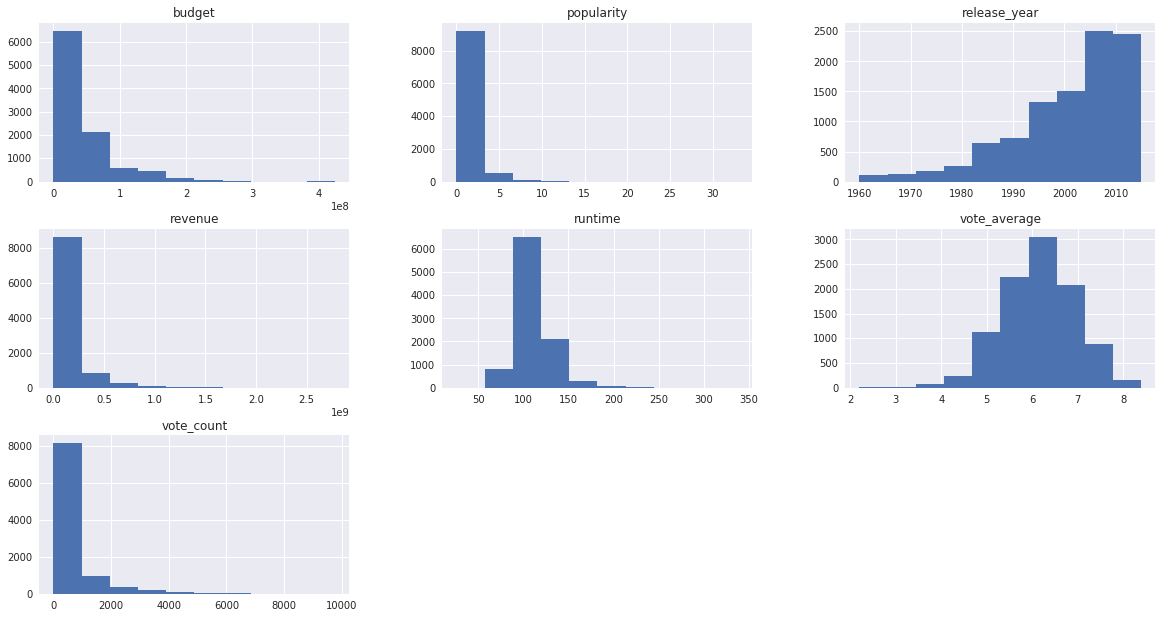

In [264]:
merged_df.hist(figsize = (20,10.5));

#### Let's make some functions to help us during the visualization process

In [265]:
def get_max(column_name):
    """This function will help me get the name and its maximum value"""
    column_value = merged_df[column_name].max()
    movie_name = merged_df[merged_df[column_name] == column_value]['original_title'][0]
    return movie_name , column_value

In [266]:
def figuer_labels(title , x ,y):
    """used for the figuer title and labels"""
    plt.title(title,fontsize=15)
    plt.xlabel(x,fontsize=15)
    plt.ylabel(y,fontsize= 15);
    return title,x,y

In [267]:
def top_ten_plot_fun(column1 , column2 ,title , xlabel, ylabel):
    """used to get top 10 movie names in a specefic category in a plot figure"""
    info = pd.DataFrame(merged_df[column1])
    info[column2] = merged_df[column2]
    info_group = info.groupby(column2)[column1].sum().sort_values(ascending = False)[:10]
    info_group.plot.barh(color = 'green' , figsize = (10,5) , fontsize = 10)
    figuer_labels(title,xlabel,ylabel)
    return column1, column2, title, xlabel, ylabel

## Q1: Which movie title had the longest run time?

In [268]:
#get movie that has the longest run time
get_max('runtime')

('Carlos', 338)

#### Carlos is the longest runtime movie with (338 h)

## Q2: Is there a relation between popularity and revenue ?

In [269]:
def box_polt(column_name):
    """This function will help the destripuation between revenue and popularity"""
    merged_df.boxplot(column_name , vert = False , showfliers = False)

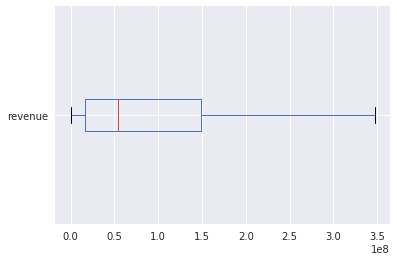

In [270]:
box_polt('revenue')

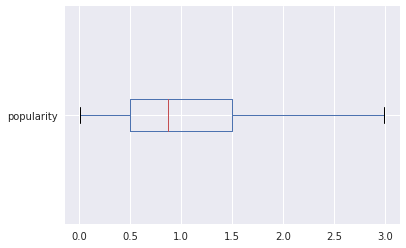

In [271]:
box_polt('popularity')

#### Let's see the relation between Popularity and Revenue

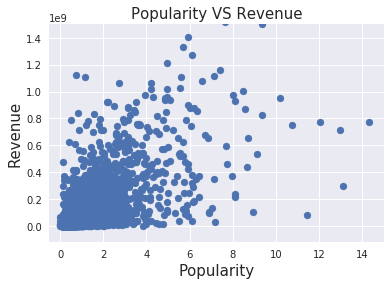

In [272]:
#plot a 'scatter' plot to get the relation between popularity and revenue.
plt.scatter(data = df, x = 'popularity', y = 'revenue')
plt.xlim(-.5, 15)
plt.ylim(-119075292.35, 1.5e9)
figuer_labels('Popularity VS Revenue', 'Popularity', 'Revenue');

#### here we can find that Revenue increases with increase in Popularity. So we can conclude that there's a positive corelation between Popularity and Revenue

## Q3: Which Genre Has The Highest Release Of Movies?

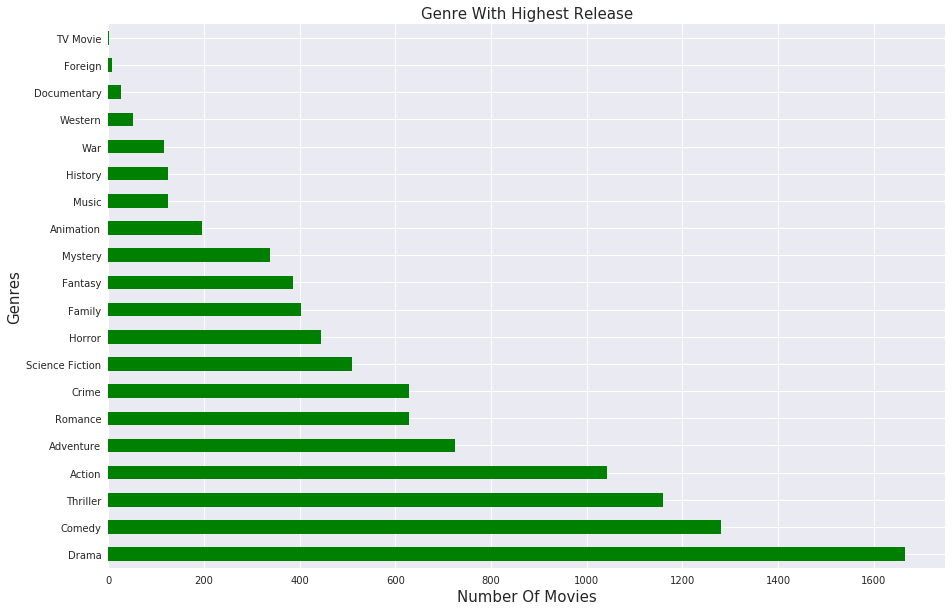

In [273]:
#count each of the gener
info = merged_df.genres_adj.value_counts()
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
info.plot.barh(color = 'green' , figsize = (15,10) , fontsize = 10)
figuer_labels("Genre With Highest Release", "Number Of Movies" , "Genres");

#### According to the plot Drama has the highest release of movies followed by Comedy and Thriller.

## Q4: Which year has the heighest release of movies?

In [274]:
info = merged_df.groupby('release_year').popularity.count()
info.tail()

release_year
2011    485
2012    372
2013    399
2014    375
2015    391
Name: popularity, dtype: int64

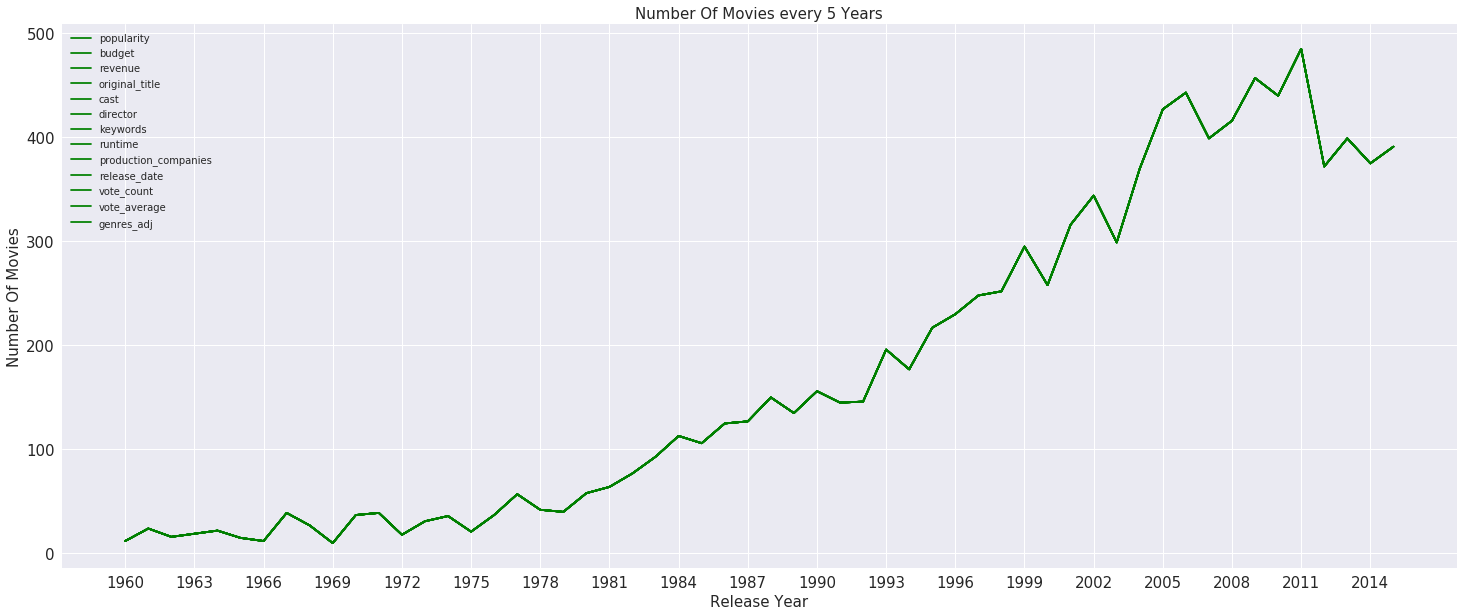

In [275]:
# make group for each year and count the number of movies in each year 
info = merged_df.groupby('release_year').count()
info.plot(color = 'green' , figsize = (25,10) , fontsize = 15,xticks = np.arange(1960,2016 , 3))
figuer_labels("Number Of Movies every 5 Years", "Release Year" , "Number Of Movies");

#### here we can conclude that year 2011 has the highest release of movies (485) then 2013 (399) and year 2015 (391).

## Q5: Top ten movies in terms of revenues.

In [54]:
get_name_value('revenue')

('Avatar', 2781505847)

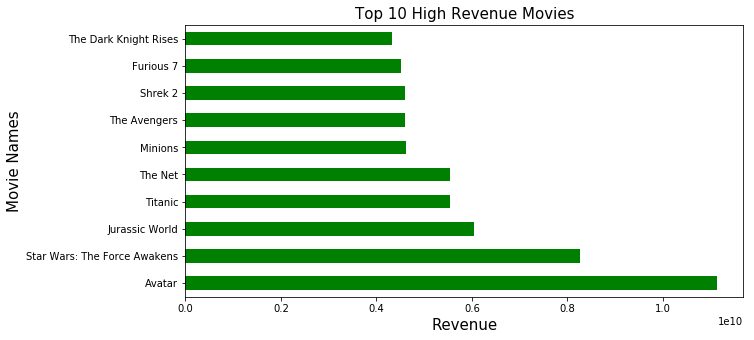

In [82]:
#top 10 movies which made highest revenue.
                # column1    #column2               # title                   xlabel     ylabel
top_ten_plot_fun('revenue', 'original_title', 'Top 10 High Revenue Movies', 'Revenue', 'Movie Names');

#### As we can see that 'Avatar' movie has the highest profit in all, making over 2.7B in profit in this dataset.

## Q6: Top ten movies in terms of budget.

In [277]:
get_name_value('budget')

(("The Warrior's Way", 425000000), 425000000)

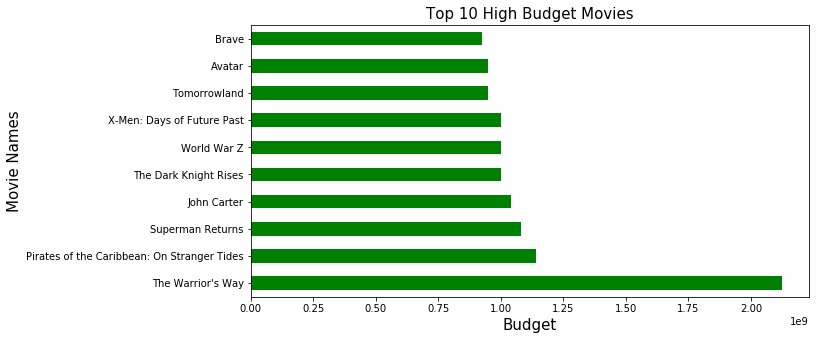

In [85]:
#top 10 movies in terms of budget.
                # column1    #column2               # title               xlabel     ylabel
top_ten_plot_fun('budget', 'original_title', 'Top 10 High Budget Movies', 'Budget', 'Movie Names');

#### As we can see that 'The Warrior's Way' movie has the highest budget in all, over 4.2B in this dataset.

## Q7: Top ten movies in terms of popularity.

In [66]:
get_name_value('popularity')

('Jurassic World', 32.985762999999999)

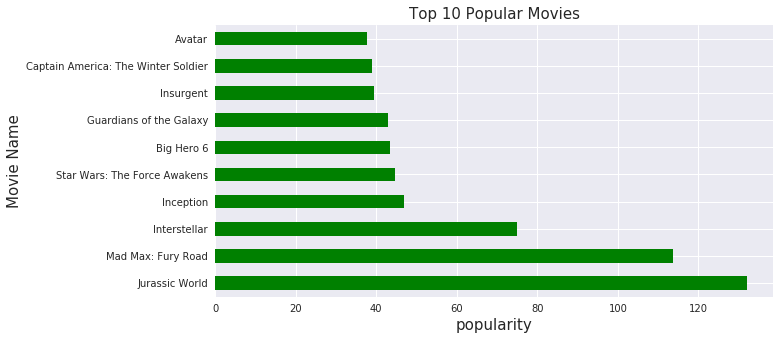

In [97]:
# top 10 movies in terms of popularity.
top_ten_plot_fun('popularity', 'original_title', "Top 10 Popular Movies", "popularity" , "Movie Name");

#### As we can see that 'Jurassic World' movie is the most popular movie in this dataset.

#### Function to get the average

In [178]:
def get_avg(column_name):
    """will return the average of a specefic column"""
    return merged_df[column_name].mean().round()

## Q8: Average Budget of the movies

In [179]:
#get the average of the budget
get_avg('budget')

42585446.0

## Q9: Average Revenue of the movies

In [180]:
#get the average of the revenue
get_avg('revenue')

123568602.0

## Q10: Average Runtime movies

In [181]:
#get the average runtime
get_avg('runtime')

110.0

## Q11: Most Frequent Cast

####  splitting cast column into multiple rows in a seperate data frame then create a seperate dataframe from unique geners records and rotate it

In [237]:
cast = merged_df['cast'].str.split("|" , expand = True)
cast = cast.stack()
cast = pd.Series(cast)

In [239]:
cast.value_counts().head()

Bruce Willis         141
Nicolas Cage         138
Samuel L. Jackson    129
Robert De Niro       127
Eddie Murphy         108
dtype: int64

<a id='conclusions'></a>
## Conclusions
> In this project, we started our analysis by examining the heighst release of movies regarding the gener, we notice the Drama movies are the most popular movies gener, the examined the movie popularty year by year, we notice that 2011 has the heighst release of movies. finally there were a positive corelation between popularity and revenue
<ul>
    <li>Drama is the most popular genre, following by action, comedy and thriller. so, my recomended Gener is: Drama, Thriller, Action, Comedy</li>
    <li>Average duration of the movie should be around 110 min.</li>
    <li>Average budget should be around 43M or above.</li>
    <li>Recomnded cast: "Bruce Willis", "Nicolas Cage", "Samuel L. Jackson", "Robert De Niro", "Eddie Murphy".</li>
    <li>Higher popularity leads to higher profits</li>
</ul>

## Limitations

<ul>
    <li>During the analysis process the columns (revenue and budget) contain many missing values which've been dropped. This seems not the best way to fix those columns but was the best way to deal with these missing values at least in my prespective of view</li>
</ul>

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [279]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0